In [357]:
import pandas as pd
import numpy as np
import os, pickle
from pandasai import PandasAI as pdai
import seaborn as sns

In [37]:
"""
try:
    from openaikey import apikey
    print(f"apikey correctly imported: {apikey}")
except:
    print("create a openaikey.py file with apikey=yourkey")"""


'\ntry:\n    from openaikey import apikey\n    print(f"apikey correctly imported: {apikey}")\nexcept:\n    print("create a openaikey.py file with apikey=yourkey")'

In [38]:
"""#instantiate pandasai
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_token=apikey)

pandas_ai = pdai(llm, conversational=True)"""

'#instantiate pandasai\nfrom pandasai.llm.openai import OpenAI\nllm = OpenAI(api_token=apikey)\n\npandas_ai = pdai(llm, conversational=True)'

In [4]:
#list all files in data folder
files = os.listdir('data')


In [5]:
files[0].replace(".csv","")
#load files[0] in a dataframe
df = pd.read_csv('data/'+files[0])

/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_99424/3345907934.py:3: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/'+files[0])


In [6]:
#for file in files load file csv in a dataframe
datas={}
for file in files:
    datas[file.replace(".csv","")]=pd.read_csv('data/'+file)




/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_99424/4195821602.py:4: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  datas[file.replace(".csv","")]=pd.read_csv('data/'+file)


In [7]:
datas.keys()

dict_keys(['weather_legs', 'legs', 'user_details', 'experience_factors', 'mots', 'user_generic_worthwhileness_values', 'worthwhileness_elements_from_trips', 'activities', 'user_specific_worthwhileness_values', 'weather_raw', 'legs_coordinates', 'trips', 'purposes'])

In [8]:
datas['legs']['dateonly']=datas['legs']['start_date'].apply(lambda x: x.split(' ')[0])

In [9]:
datas['legs'].groupby(['userid','dateonly','tripid']).count()

legid  class  motid   
userid                       dateonly   tripid                            
01joA7CpmoSCykPkXgexjUJmo0t1 2019-10-25 #133:20591      2      2      2  \
                                        #31:16660       1      1      1   
                                        #32:16012       1      1      1   
                                        #32:16060       1      1      1   
                             2019-10-26 #30:16296       1      1      1   
...                                                   ...    ...    ...   
zzud3VJFYAd8w00PlyVkfjQJvNH2 2019-06-22 #33:4087        1      1      1   
                             2019-06-23 #31:4146        4      4      4   
                             2019-06-26 #30:4415        8      8      8   
                                        #32:4356        3      3      3   
                                        #33:4332        1      1      1   

                                                    start_date  end_date   
userid                       dateonly   tripid                             
01joA7CpmoSCykPkXgexjUJmo0t1 2019-10-25 #133:20591           2         2  \
                                        #31:16660            1         1   
                                        #32:16012            1         1   
                                        #32:16060            1         1   
                             2019-10-26 #30:16296            1         1   
...                                                        ...       ...   
zzud3VJFYAd8w00PlyVkfjQJvNH2 2019-06-22 #33:4087             1         1   
                             2019-06-23 #31:4146             4         4   
                             2019-06-26 #30:4415             8         8   
                                        #32:4356             3         3   
                                        #33:4332             1         1   

                                                    true_distance   
userid                       dateonly   tripid                      
01joA7CpmoSCykPkXgexjUJmo0t1 2019-10-25 #133:20591              2  \
                                        #31:16660               1   
                                        #32:16012               1   
                                        #32:16060               1   
                             2019-10-26 #30:16296               1   
...                                                           ...   
zzud3VJFYAd8w00PlyVkfjQJvNH2 2019-06-22 #33:4087                1   
                             2019-06-23 #31:4146                3   
                             2019-06-26 #30:4415                6   
                                        #32:4356                2   
                                        #33:4332                1   

                                                    leg_distance   
userid                       dateonly   tripid                     
01joA7CpmoSCykPkXgexjUJmo0t1 2019-10-25 #133:20591             2  \
                                        #31:16660              1   
                                        #32:16012              1   
                                        #32:16060              1   
                             2019-10-26 #30:16296              1   
...                                                          ...   
zzud3VJFYAd8w00PlyVkfjQJvNH2 2019-06-22 #33:4087               1   
                             2019-06-23 #31:4146               3   
                             2019-06-26 #30:4415               6   
                                        #32:4356               2   
                                        #33:4332               1   

                                                    leg_duration   
userid                       dateonly   tripid                     
01joA7CpmoSCykPkXgexjUJmo0t1 2019-10-25 #133:20591             2  \
                                        #31:16660              1   
                                

In [10]:
#return the average number of tripid per user per day
datas['legs'].groupby(['userid','dateonly']).count().groupby('userid').mean()['tripid'].mean()

4.597558471373145

In [11]:
datas['legs']['transport_category'].value_counts()

transport_category
walking                           55246
private_motorized                 30537
cycling_emerging_micromobility    19234
public_transp_short_dist          14510
public_transp_long_dist            1104
Name: count, dtype: int64

In [12]:
datas['legs'][pd.isna(datas['legs']['transport_category'])]

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly
15,#28:2213,WaitingEvent,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:3465,4,2019-06-13 07:07:33.756,2019-06-13 07:09:25.096,NaN,NaN,0.000,-1.0,NaN,BEL,Thursday,Working_day,2019-06-13
40,#28:1036,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 08:00:21.952,2019-05-11 08:05:56.037,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
42,#29:1014,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 08:35:08.045,2019-05-11 08:40:49.986,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
45,#26:1077,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 10:27:05.206,2019-05-11 10:31:02.239,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
47,#27:1059,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 10:36:32.177,2019-05-11 10:42:43.123,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158861,#223:46511,Leg,vKi94YKUGFfKXGvGyogidfF6qU32,#130:20544,4,2019-11-06 18:50:44.096,2019-11-06 18:52:55.168,0.0,240.118,47.999,4.0,NaN,ESP,Wednesday,Working_day,2019-11-06
158864,#222:46518,Leg,vKi94YKUGFfKXGvGyogidfF6qU32,#131:20541,4,2019-11-14 19:35:39.264,2019-11-14 19:40:01.408,0.0,3085.847,188.006,0.0,NaN,ESP,Thursday,Working_day,2019-11-14
158874,#226:13390,WaitingEvent,vKi94YKUGFfKXGvGyogidfF6qU32,#130:21198,4,2019-11-29 08:19:06.880,2019-11-29 08:23:29.024,NaN,NaN,0.000,0.0,NaN,ESP,Friday,Working_day,2019-11-29
158878,#227:13250,WaitingEvent,xeO24JQhH5P2bPoO2QJrtdYwVlk1,#133:20946,4,2019-11-29 09:59:04.642,2019-11-29 10:23:47.928,NaN,NaN,0.000,3.0,NaN,ESP,Friday,Working_day,2019-11-29


In [13]:
datas['legs_coordinates']

,legid,start_lat,start_lon,end_lat,end_lon,start_name,start_country,start_class,end_name,end_country,end_class
0,#223:33591,51.100,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
1,#224:33591,51.130,3.165,51.130,3.165,Bruges,BEL,sub-urban,Bruges,BEL,sub-urban
2,#225:33590,51.130,3.165,51.130,3.165,Bruges,BEL,sub-urban,Bruges,BEL,sub-urban
3,#222:33592,51.150,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
4,#227:9335,51.150,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
...,...,...,...,...,...,...,...,...,...,...,...
180508,#224:47071,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180509,#225:47061,46.520,6.565,46.545,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180510,#222:47083,46.625,6.575,46.520,6.575,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180511,#223:47078,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban


In [14]:
legmerged=pd.merge(datas['legs'],datas['legs_coordinates'],on='legid')
legmerged

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,start_lat,start_lon,end_lat,end_lon,start_name,start_country,start_class,end_name,end_country,end_class
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,38.736,-9.141,38.735,-9.141,Lisbon,PRT,urban,Lisbon,PRT,urban
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,50.847,4.353,50.845,4.357,Brussels,BEL,urban,Brussels,BEL,urban
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,51.200,4.850,51.200,4.850,NaN,NaN,rural,NaN,NaN,rural
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,51.200,4.800,51.200,4.800,NaN,NaN,rural,NaN,NaN,rural
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,51.200,4.850,51.200,4.800,NaN,NaN,rural,NaN,NaN,rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,46.540,6.565,46.545,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130613,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,46.545,6.565,46.525,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130614,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130615,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban


In [15]:
datas['user_details']['gender'].value_counts()

gender
Male      1880
Female    1435
Other       15
Name: count, dtype: int64

In [129]:
leg_coor_user_merged = pd.merge(legmerged,datas['user_details'],on='userid')
#parse start_date to datetime format
leg_coor_user_merged['start_date']=pd.to_datetime(leg_coor_user_merged['start_date'])
leg_coor_user_merged['end_date']=pd.to_datetime(leg_coor_user_merged['end_date'])
leg_coor_user_merged



,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,gender,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130613,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130614,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130615,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN


In [130]:
leg_coor_user_merged.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'dateonly', 'start_lat', 'start_lon', 'end_lat',
       'end_lon', 'start_name', 'start_country', 'start_class', 'end_name',
       'end_country', 'end_class', 'registration_date', 'gender', 'age_range',
       'lang', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household'],
      dtype='object')

In [131]:
#take columns start_lat, start_lon, end_lat, end_lon from leg_coor_user_merged and create a geopandas dataframe with crs epsg 3857 and point geometry with start coordinate
import geopandas as gpd
from shapely.geometry import Point
leg_coor_user_merged['start_point']=leg_coor_user_merged.apply(lambda x: Point(x['start_lon'],x['start_lat']),axis=1)

In [132]:
#convert leg_coor_user_merged to geo dataframe
leg_coor_user_merged=gpd.GeoDataFrame(leg_coor_user_merged,geometry='start_point',crs='epsg:4326')

#take columns start_lat, start_lon, end_lat, end_lon from leg_coor_user_merged and create a geopandas dataframe with crs epsg 3857 and point geometry with start coordinate
import geopandas as gpd
from shapely.geometry import LineString
leg_coor_user_merged['geometry']=leg_coor_user_merged.apply(lambda x: LineString([(x['start_lon'],x['start_lat']),(x['end_lon'],x['end_lat'])]),axis=1)


In [136]:
#convert leg_coor_user_merged to geo dataframe
leg_coor_user_merged=gpd.GeoDataFrame(leg_coor_user_merged,geometry='start_point',crs='epsg:4326')

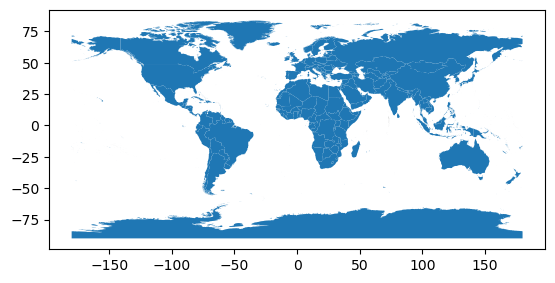

In [144]:
world.plot()
plt.show()


In [150]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']





/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_99424/2823248467.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


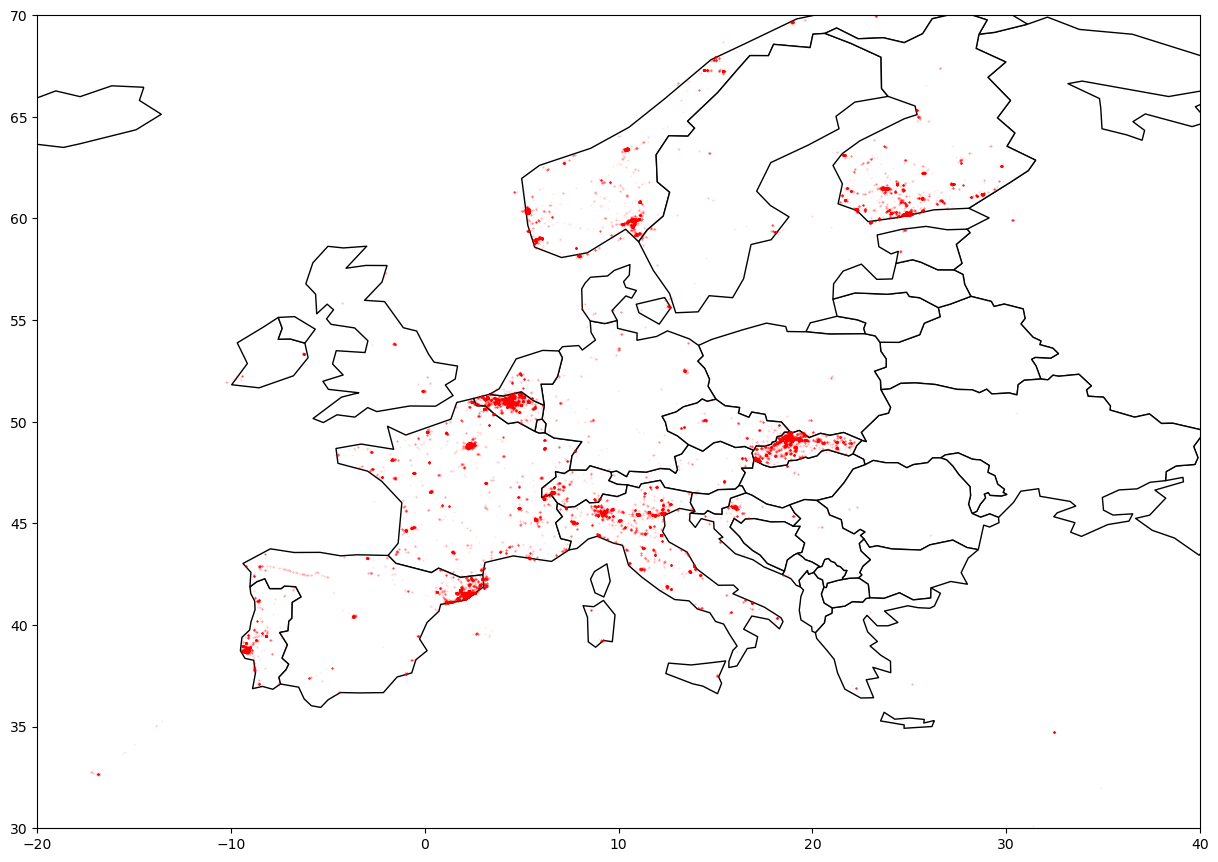

In [151]:
#plot leg_coor_user_merged['start_point'] on europe map
fig, ax = plt.subplots(figsize=(15,15))
europe.plot(ax=ax, color='white', edgecolor='black')
leg_coor_user_merged.plot(ax=ax, color='red', markersize=0.2, alpha=0.1)
ax.set_xlim(-20, 40)
ax.set_ylim(30, 70)
plt.show()




In [152]:
#filter leg_coor_user_merged to get only with both start and end inside italy
italy=world[world['name']=='Italy']


leg_coor_user_merged_italy=sjoin(leg_coor_user_merged,italy,how='inner',op='intersects')



/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


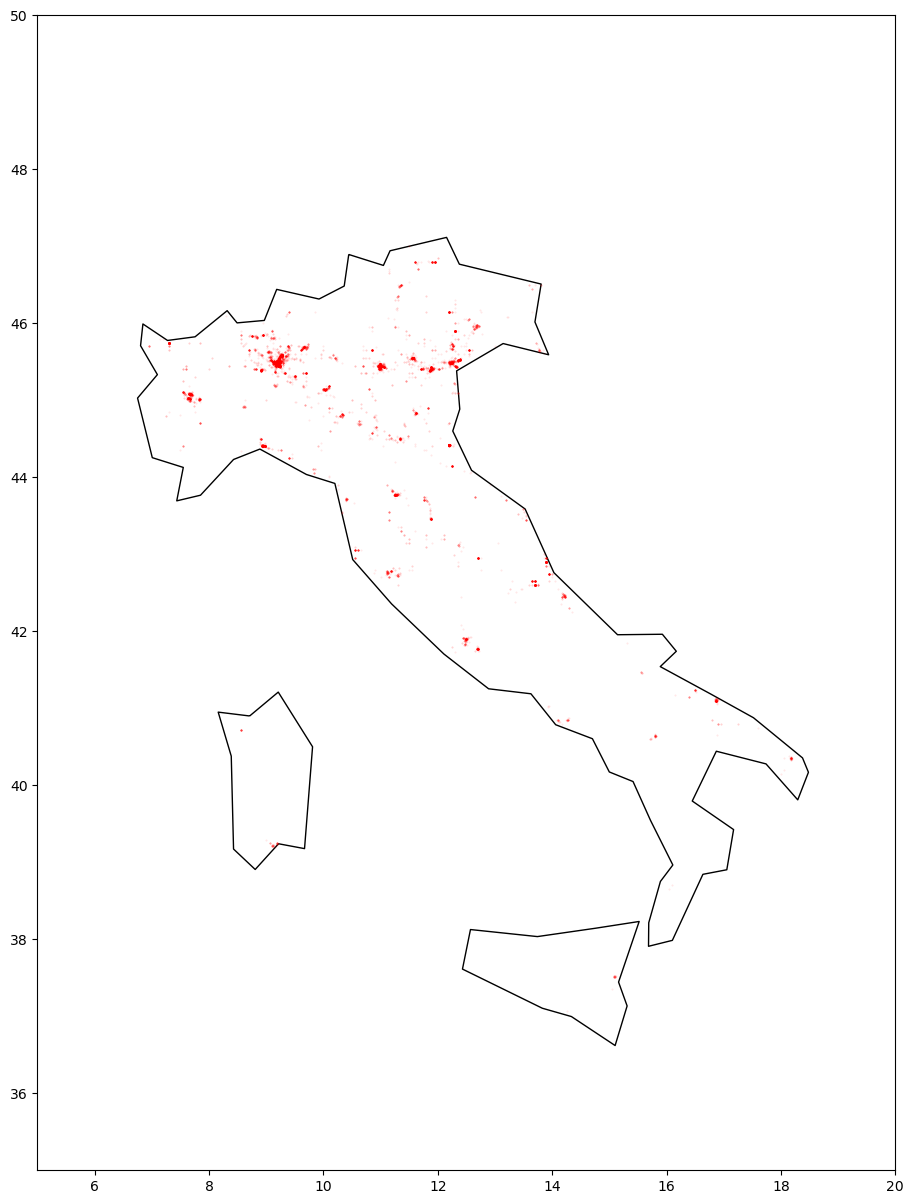

In [153]:
#do the same plot but for italy only
italy = world[world['name'] == 'Italy']
fig, ax = plt.subplots(figsize=(15,15))
italy.plot(ax=ax, color='white', edgecolor='black')
leg_coor_user_merged_italy.plot(ax=ax, color='red', markersize=0.2, alpha=0.1)
ax.set_xlim(5, 20)
ax.set_ylim(35, 50)
plt.show()


In [175]:
#join leg_coor_user_merged with datas['purposes'] on tripid
leg_coor_user_merged_purposes = pd.merge(leg_coor_user_merged,datas['purposes'],on='tripid') 

In [185]:
#find columns with more then 20000 nan values and drop them
todrop=leg_coor_user_merged_purposes.isna().sum()[leg_coor_user_merged_purposes.isna().sum()>20000].index.to_list()
leg_coor_user_merged_purposes.drop(columns=todrop,inplace=True)

In [186]:
leg_coor_user_merged_purposes.isna().sum()

legid                        0
class                        0
userid                       0
tripid                       0
motid                        0
start_date                   0
end_date                     0
true_distance            14101
leg_distance             14099
leg_duration                 0
worthwhileness_rating        0
transport_category       14199
campaign                     0
weekday                      0
weekday_class                0
dateonly                     0
start_lat                    0
start_lon                    0
end_lat                      0
end_lon                      0
start_class                  0
end_class                    0
gender                       0
age_range                    0
city                         0
country                      0
start_point                  0
purpose                      0
dtype: int64

In [189]:
leg_coor_user_merged_purposes

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,end_lat,end_lon,start_class,end_class,gender,age_range,city,country,start_point,purpose
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,38.735,-9.141,urban,urban,Male,16-24,Lisboa,PRT,POINT (-9.14100 38.73600),Other
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,50.845,4.357,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35300 50.84700),Home
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,51.200,4.850,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Home
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,51.200,4.800,rural,rural,Male,25-49,Brussels,BEL,POINT (4.80000 51.20000),Home
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,51.200,4.800,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168401,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,46.545,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.54000),Work
168402,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,46.525,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.54500),Work
168403,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,46.520,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.52000),Work
168404,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,46.520,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.52000),Everyday_Shopping


In [198]:
#join leg_coor_user_merged_purposes with datas['motid'] motid
leg_coor_user_merged_purposes_motid = pd.merge(leg_coor_user_merged_purposes,datas['mots'],on='motid')

In [199]:
leg_coor_user_merged_purposes_motid

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,end_lon,start_class,end_class,gender,age_range,city,country,start_point,purpose,mot_text
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,-9.141,urban,urban,Male,16-24,Lisboa,PRT,POINT (-9.14100 38.73600),Other,walking
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,4.357,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35300 50.84700),Home,walking
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,4.850,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Home,walking
3,#23:8271,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:3353,7,2019-05-21 14:29:49.702,2019-05-21 14:50:24.450,0.0,2414.0,0.0,...,4.357,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35200 50.84800),Other,walking
4,#24:7213,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2932,7,2019-05-24 18:13:57.075,2019-05-24 18:20:02.353,473.0,473.0,0.0,...,4.850,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Business_Trip,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168401,#23:5676,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:2339,36,2019-05-23 12:22:34.702,2019-05-23 12:51:01.790,0.0,12735.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.49700 43.52800),Business_Trip,carSharingPassenger
168402,#23:5676,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:2339,36,2019-05-23 12:22:34.702,2019-05-23 12:51:01.790,0.0,12735.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.49700 43.52800),Work,carSharingPassenger
168403,#25:6214,Leg,z5TAgZnoItOaDS6gMWU6SfadU4A2,#32:2560,36,2019-05-27 11:48:08.171,2019-05-27 13:06:18.708,0.0,8907.0,4690.0,...,-9.157,urban,urban,Male,50-64,Lisbon,PRT,POINT (-9.15100 38.73700),Work,carSharingPassenger
168404,#23:5138,Leg,7Is12c2963RIfW7XVjX7k5pCUBo1,#32:2081,31,2019-05-20 08:47:14.115,2019-05-20 08:54:49.878,0.0,297.0,0.0,...,9.228,urban,urban,Male,25-49,Milan,ITA,POINT (9.22900 45.51600),Everyday_Shopping,otherActive


In [245]:

leg_coor_user_merged_purposes_motid.groupby(['gender','tripid']).count()['legid'].groupby('gender').mean()


gender
Female    2.515592
Male      2.719211
Other     3.320611
Name: legid, dtype: float64

In [270]:
#return the average indicator for each user and gender
leg_coor_user_merged_purposes_motid.groupby(['gender','userid','dateonly']).nunique().groupby('gender').mean()

,legid,class,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,...,end_lat,end_lon,start_class,end_class,age_range,city,country,start_point,purpose,mot_text
gender,,,,,,,,,,,,,,,,,,,,,
Female,4.639193,1.159237,2.326231,1.959069,4.603121,4.603308,3.545556,4.222503,1.558826,2.094851,...,3.028689,3.251752,1.221755,1.207270,1.0,1.0,1.0,3.642276,1.945799,1.959069
Male,5.042770,1.151544,2.431774,2.004509,4.992799,4.993613,3.941449,4.598096,1.524015,2.129501,...,3.142839,3.369716,1.266516,1.245726,1.0,1.0,1.0,3.829232,1.994489,2.004509
Other,5.027027,1.310811,1.837838,2.148649,5.027027,5.027027,4.067568,4.378378,1.351351,2.013514,...,3.581081,3.783784,1.432432,1.418919,1.0,1.0,1.0,4.067568,1.621622,2.148649


In [271]:
leg_coor_user_merged_purposes_motid.purpose.unique()

array(['Other', 'Home', 'Business_Trip', 'Work', 'Leisure_Hobby',
       'Personal_Tasks_Errands', 'Everyday_Shopping', 'Pick_Up_Drop_Off'],
      dtype=object)

In [278]:
#select only row with purpose work
workonly=leg_coor_user_merged_purposes_motid[leg_coor_user_merged_purposes_motid['purpose'].isin(['Work'])]
workonly

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,end_lon,start_class,end_class,gender,age_range,city,country,start_point,purpose,mot_text
9,#22:8516,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:3481,7,2019-06-13 10:09:36.113,2019-06-13 14:04:40.217,62.0,212.0,0.0,...,4.348,urban,urban,Male,25-49,Brussels,BEL,POINT (4.34800 50.86200),Work,walking
12,#25:11165,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:4620,7,2019-07-02 05:26:11.712,2019-07-02 08:00:21.941,0.0,575.0,0.0,...,4.350,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35600 50.84500),Work,walking
13,#22:3739,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#32:1547,7,2019-05-10 07:14:09.450,2019-05-10 07:26:15.517,324.0,324.0,0.0,...,4.385,urban,urban,Male,25-49,Brussels,BEL,POINT (4.38900 50.84600),Work,walking
26,#23:4562,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1849,7,2019-05-13 07:03:01.686,2019-05-13 07:12:16.147,455.0,455.0,0.0,...,4.385,urban,urban,Male,25-49,Brussels,BEL,POINT (4.39000 50.84700),Work,walking
29,#24:4535,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#31:1897,7,2019-05-13 16:00:56.030,2019-05-13 16:04:42.736,313.0,313.0,0.0,...,4.341,urban,urban,Male,25-49,Brussels,BEL,POINT (4.34300 50.83400),Work,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168395,#23:4268,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#33:1723,32,2019-05-13 12:36:21.470,2019-05-13 13:01:53.416,0.0,12625.0,0.0,...,1.452,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.36600 43.65400),Work,otherPrivate
168399,#22:4287,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:1771,32,2019-05-13 14:51:32.172,2019-05-13 15:16:19.536,0.0,13079.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.36400 43.59000),Work,otherPrivate
168402,#23:5676,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:2339,36,2019-05-23 12:22:34.702,2019-05-23 12:51:01.790,0.0,12735.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.49700 43.52800),Work,carSharingPassenger
168403,#25:6214,Leg,z5TAgZnoItOaDS6gMWU6SfadU4A2,#32:2560,36,2019-05-27 11:48:08.171,2019-05-27 13:06:18.708,0.0,8907.0,4690.0,...,-9.157,urban,urban,Male,50-64,Lisbon,PRT,POINT (-9.15100 38.73700),Work,carSharingPassenger


In [292]:
workonly.groupby(['gender','transport_category']).count()['legid']
#normalize count

gender  transport_category            
Female  cycling_emerging_micromobility     2034
        private_motorized                  2425
        public_transp_long_dist             128
        public_transp_short_dist           2539
        walking                            5962
Male    cycling_emerging_micromobility     5190
        private_motorized                  5158
        public_transp_long_dist             299
        public_transp_short_dist           3714
        walking                           10109
Other   cycling_emerging_micromobility        3
        private_motorized                    58
        public_transp_short_dist             50
        walking                              74
Name: legid, dtype: int64

In [285]:
workonly.groupby('gender').size()

gender
Female    13949
Male      26012
Other       214
dtype: int64

In [308]:
#Return relative frequency of transport category per each gender
workonly.groupby(['gender', 'transport_category']).size() / workonly.dropna(subset='transport_category').groupby('gender').size()



gender  transport_category            
Female  cycling_emerging_micromobility    0.155410
        private_motorized                 0.185284
        public_transp_long_dist           0.009780
        public_transp_short_dist          0.193994
        walking                           0.455532
Male    cycling_emerging_micromobility    0.212096
        private_motorized                 0.210789
        public_transp_long_dist           0.012219
        public_transp_short_dist          0.151778
        walking                           0.413118
Other   cycling_emerging_micromobility    0.016216
        private_motorized                 0.313514
        public_transp_short_dist          0.270270
        walking                           0.400000
dtype: float64

In [323]:
#Return relative frequency of transport category per each gender indicating not the number of leg but the sum of leg distance
workonly.groupby(['gender', 'transport_category'])['leg_distance'].sum()/ workonly.dropna(subset='leg_distance').groupby('gender')['leg_distance'].sum()

gender  transport_category            
Female  cycling_emerging_micromobility    0.114993
        private_motorized                 0.371835
        public_transp_long_dist           0.195359
        public_transp_short_dist          0.272174
        walking                           0.044898
Male    cycling_emerging_micromobility    0.157258
        private_motorized                 0.446206
        public_transp_long_dist           0.101713
        public_transp_short_dist          0.257709
        walking                           0.036779
Other   cycling_emerging_micromobility    0.009644
        private_motorized                 0.900021
        public_transp_short_dist          0.069775
        walking                           0.020560
Name: leg_distance, dtype: float64

In [333]:
legdistribution=workonly.groupby(['gender', 'transport_category'])['leg_distance'].sum()/ workonly.dropna(subset='leg_distance').groupby('gender')['leg_distance'].sum()
legdistribution


gender  transport_category            
Female  cycling_emerging_micromobility    0.114993
        private_motorized                 0.371835
        public_transp_long_dist           0.195359
        public_transp_short_dist          0.272174
        walking                           0.044898
Male    cycling_emerging_micromobility    0.157258
        private_motorized                 0.446206
        public_transp_long_dist           0.101713
        public_transp_short_dist          0.257709
        walking                           0.036779
Other   cycling_emerging_micromobility    0.009644
        private_motorized                 0.900021
        public_transp_short_dist          0.069775
        walking                           0.020560
Name: leg_distance, dtype: float64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'cycling_emerging_micromobility'),
  Text(1, 0, 'private_motorized'),
  Text(2, 0, 'public_transp_long_dist'),
  Text(3, 0, 'public_transp_short_dist'),
  Text(4, 0, 'walking')])

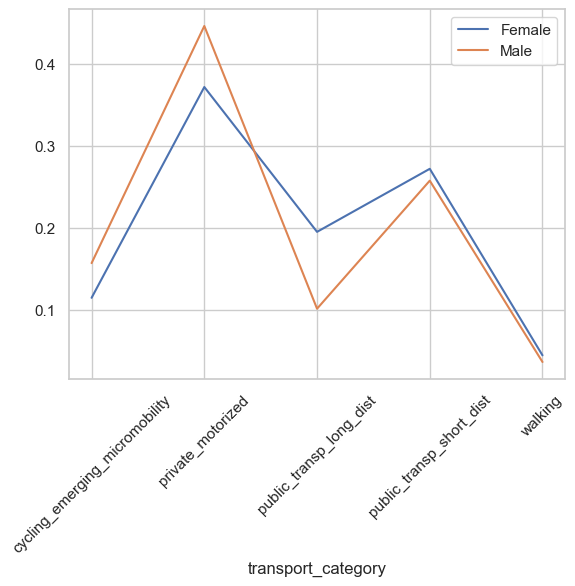

In [356]:
#create seaborn plot for legdistribution female and male

sns.set_theme(style="whitegrid")
sns.lineplot(x=legdistribution['Female'].index, y=legdistribution['Female'].values,legend='brief',label='Female')
sns.lineplot(x=legdistribution['Male'].index, y=legdistribution['Male'].values,legend='brief',label='Male')

plt.xticks(rotation=45)



In [343]:
legdistribution.index

MultiIndex([('Female', 'cycling_emerging_micromobility'),
            ('Female',              'private_motorized'),
            ('Female',        'public_transp_long_dist'),
            ('Female',       'public_transp_short_dist'),
            ('Female',                        'walking'),
            (  'Male', 'cycling_emerging_micromobility'),
            (  'Male',              'private_motorized'),
            (  'Male',        'public_transp_long_dist'),
            (  'Male',       'public_transp_short_dist'),
            (  'Male',                        'walking'),
            ( 'Other', 'cycling_emerging_micromobility'),
            ( 'Other',              'private_motorized'),
            ( 'Other',       'public_transp_short_dist'),
            ( 'Other',                        'walking')],
           names=['gender', 'transport_category'])